---

In [1]:
import os
import numpy as np
import pandas as pd

from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#The dataset for today is taken from:
#https://archive.ics.uci.edu/ml/datasets/automobile

In [3]:
df = pd.read_csv(r'C:\Users\sofia\Desktop\Python\automobile_price_data.csv')

In [17]:
df

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
189,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
190,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
191,-1,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [4]:
df = df.drop('normalized-losses', axis = 1)

df = df.replace({'?': np.nan})

df = df.dropna().reset_index(drop=True)

df = df.astype({'price': 'int32', 
                            'bore': 'float32', 
                            'stroke': 'float32', 
                            'horsepower': 'int32', 
                            'peak-rpm': 'int32'})

df = df.dropna().reset_index(drop=True)

df.columns = df.columns.astype(str).str.replace("-", "_")

In [5]:
df.head()

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [7]:
X = df[['horsepower', 'engine_size', 'bore']]
y = df.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [8]:
#Creating model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [16]:
#Then we should check if prediction was made good

In [9]:
model_predict_df = pd.DataFrame({'Horse power': X_test.horsepower,
             'Engine size': X_test.engine_size,
             'Actual price': y_test,
             'Predicted price' : model.predict(X_test)}).reset_index(drop=True)

<AxesSubplot:xlabel='Predicted price', ylabel='Actual price'>

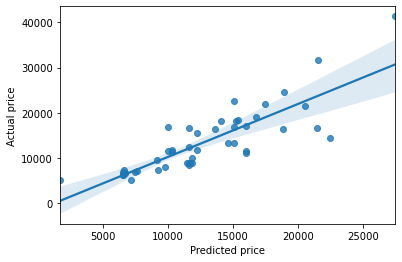

In [15]:
sns.regplot(x=model_predict_df['Predicted price'], y=model_predict_df['Actual price'], data = model_predict_df)

---

In [21]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [23]:
#RMSE
mean_squared_error(y_pred = model_predict_df['Predicted price'], y_true = model_predict_df['Actual price'], squared = False)

3925.818464393569

In [24]:
#MAE
mean_absolute_error(y_pred = model_predict_df['Predicted price'], y_true = model_predict_df['Actual price'])

2791.571195432575

In [25]:
#R-squared
r2_score(y_pred = model_predict_df['Predicted price'], y_true = model_predict_df['Actual price'])

0.6905263096081887